In [2]:
from __future__ import division

from faculty_hiring.misc.util import *
from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE, colors, etc.
from faculty_hiring.misc.productivity import *
from faculty_hiring.parse import faculty_parser, institution_parser
from faculty_hiring.parse import load
from faculty_hiring.misc.subfield import topic_descriptions, longer_topic_descriptions, num_topics 

import numpy as np
import scipy as sp
import palettable

from scipy.stats.stats import pearsonr, mannwhitneyu, ttest_ind
from scipy.stats import ttest_ind, ks_2samp, chi2_contingency, mannwhitneyu
from collections import Counter

In [3]:
faculty_file = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/current_data/faculty_cs_CURRENT.txt'
inst_file = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/current_data/inst_cs_CURRENT.txt'
figures_dir = '/Users/allisonmorgan/Code/src/github.com/samfway/faculty_hiring/notebooks-productivity/figures/'

# Path to prepped DBLP pickles
dblp_dir = '/Users/allisonmorgan/Documents/faculty_hiring/publication_data/profiles_DBLP_Nov16/'

In [4]:
inst = institution_parser.parse_institution_records(open(inst_file))
asst_faculty = load.load_assistant_profs(open(faculty_file), inst, ranking='pi')
load.load_all_publications(asst_faculty, dblp_dir)  # This takes a minute..

# Total Number of Publications

In [5]:
# Number of publications for all current assistant faculty of a university. Adjusted for inflation
ignore = ['All others', 'UNKNOWN', 'CUNY Graduate Center']
pubs_by_inst = {}
for (name, inst_data) in inst.items():
    if name in ignore:
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    n_pubs = []
    for person in current_faculty:
        if person.__contains__('dblp_pubs'):
            contribution = 0
            for pub in person.dblp_pubs:
                contribution += inflation_adjust(pub['year'])
            n_pubs.append((person.facultyName, contribution))
    if len(n_pubs) > 0:
        pubs_by_inst[name] = n_pubs

### Prestige

Line of best fit has a slope of -0.5085 and a r^2 of 0.4194


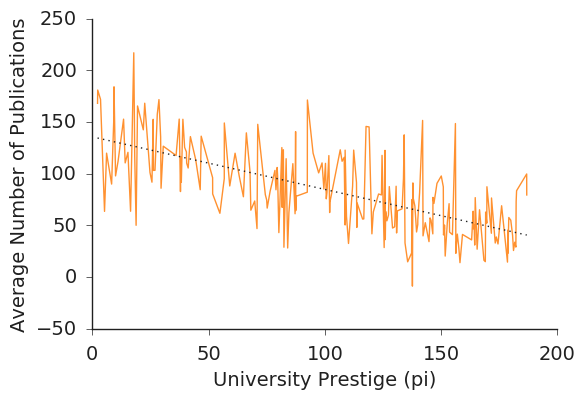

In [27]:
plot_pubs_versus_prestige(pubs_by_inst, 'Average Number of Publications', function=np.average)

Line of best fit has a slope of -0.4121 and a r^2 of 0.4147


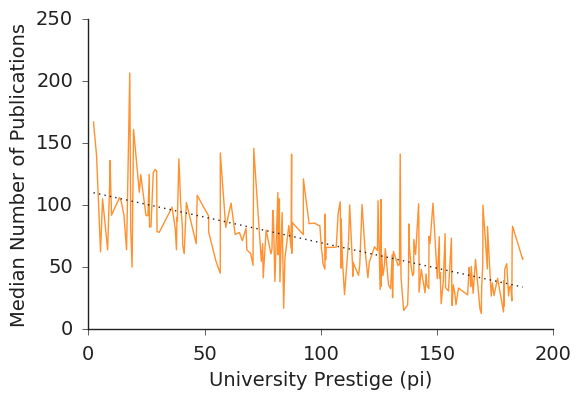

In [7]:
plot_pubs_versus_prestige(pubs_by_inst, 'Median Number of Publications', function=np.median)

Faculty at the top 10% of schools have 14.48, 40.95, and 87.85 more publications than faculty at the top 20%, 50% and 100% of schools.


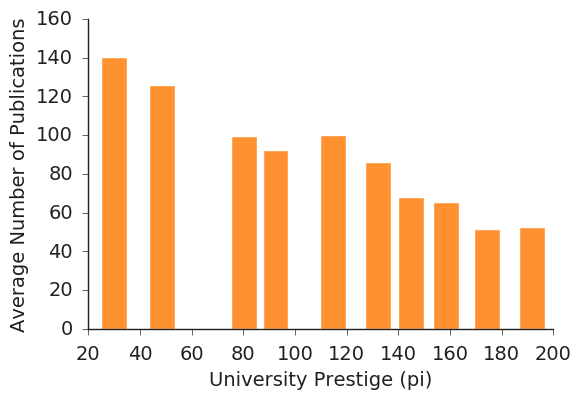

In [8]:
bins = range(0, 110, 10)
plot_binned_pubs_versus_prestige(pubs_by_inst, 'Average Number of Publications', bins)

Faculty at the top 10% of schools have 14.73, 35.69, and 72.43 more publications than faculty at the top 20%, 50% and 100% of schools.


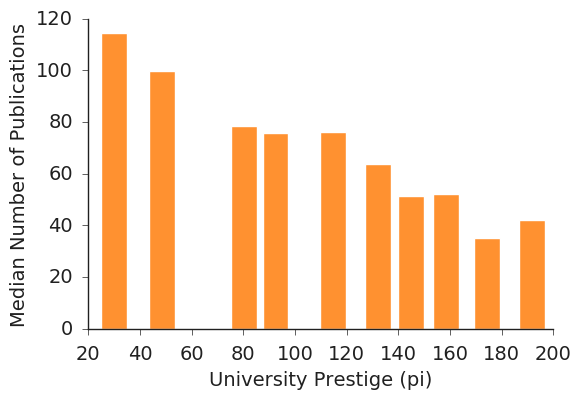

In [9]:
plot_binned_pubs_versus_prestige(pubs_by_inst, 'Median Number of Publications', bins, function=np.median)

Line of best fit has a slope of -0.5400 and a r^2 of 0.9483


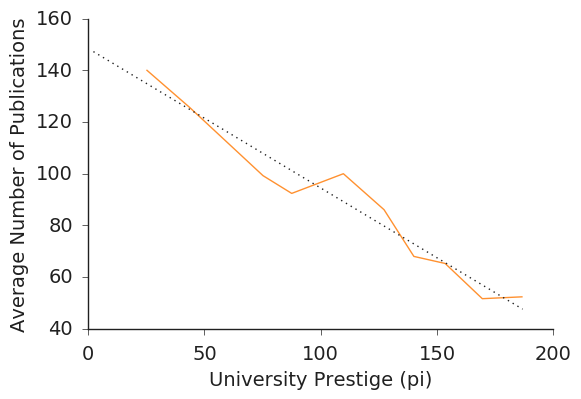

In [10]:
plot_binned_pubs_versus_prestige(pubs_by_inst, 'Average Number of Publications', bins, chart_type='line')

Line of best fit has a slope of -0.4568 and a r^2 of 0.9513


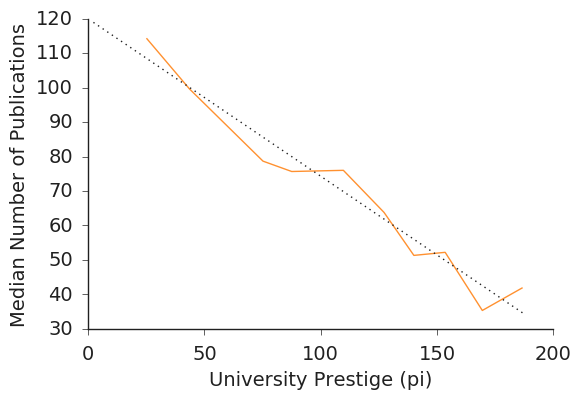

In [11]:
plot_binned_pubs_versus_prestige(pubs_by_inst, 'Median Number of Publications', bins, chart_type='line', function=np.median)

# Fractional & Total Author Contribution

In [12]:
# Fractional contribution of publications for all current assistant faculty of a university
frac_pubs_by_inst = {}; total_pubs_by_inst = {}
for (name, inst_data) in inst.items():
    if name == "UNKNOWN" or name == 'All others':
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    frac_n_pubs = []; total_n_pubs = [];
    for person in current_faculty:
        if person.__contains__('dblp_pubs'):
            frac_contribution = [1.0/float(len(pub['authors'])) for pub in person.dblp_pubs]
            contribution = [float(len(pub['authors'])) for pub in person.dblp_pubs]
            
            frac_n_pubs.append((person.facultyName, frac_contribution))
            total_n_pubs.append((person.facultyName, contribution))
            
    if len(n_pubs) > 0:
        frac_pubs_by_inst[name] = frac_n_pubs
        total_pubs_by_inst[name] = total_n_pubs

In [13]:
# This is Aaron:
#frac_pubs_by_inst['University of Colorado, Boulder'][4]

### Prestige

Line of best fit has a slope of 0.0001 and a r^2 of 0.0107


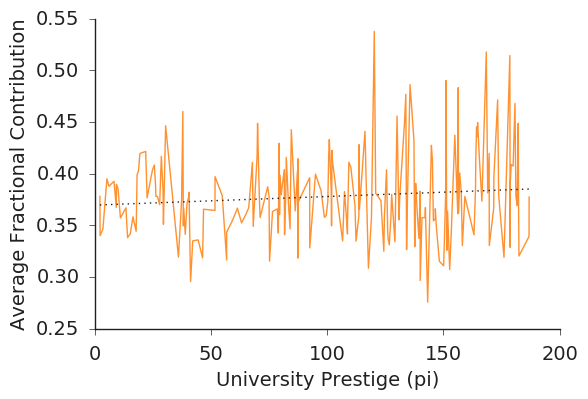

In [28]:
plot_pubs_versus_prestige(frac_pubs_by_inst, 'Average Fractional Contribution', function=np.average)

Line of best fit has a slope of -0.0013 and a r^2 of 0.0291


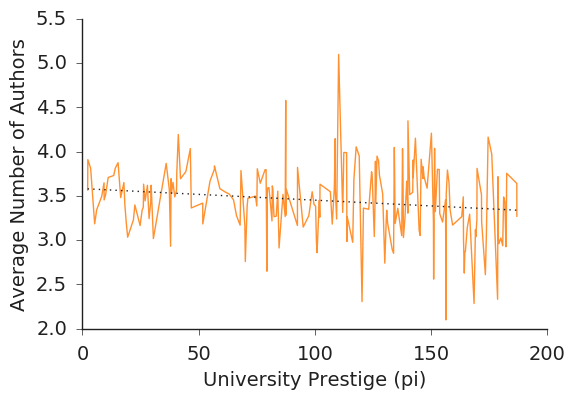

In [14]:
plot_pubs_versus_prestige(total_pubs_by_inst, 'Average Number of Authors', function=np.average)

# Exclude Middle Author Role From Number of Publications

In [21]:
# Number of publications for all current assistant faculty of a university
first_and_last_pubs_by_inst = {}
for (name, inst_data) in inst.items():
    if name == "UNKNOWN" or name == 'All others':
        continue
    current_faculty = faculty_at_institution(name, asst_faculty)
    
    n_pubs = []
    for person in current_faculty:
        if person.__contains__('dblp_pubs'):
            first_and_last_contributions = [pub for pub in person.dblp_pubs if pub['author_role'] != 1]
            n_pubs.append((person.facultyName, len(first_and_last_contributions)))
    if len(n_pubs) > 0:
        first_and_last_pubs_by_inst[name] = n_pubs

In [22]:
# This is also Aaron:
#print first_and_last_pubs_by_inst['University of Colorado, Boulder'][4]
#print pubs_by_inst['University of Colorado, Boulder'][4]

### Prestige

Line of best fit has a slope of -0.2978 and a r^2 of 0.3545


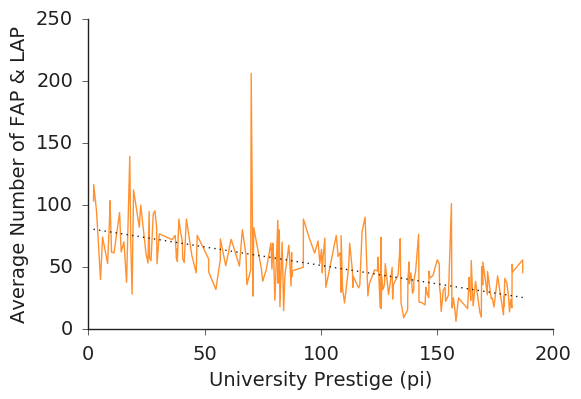

In [23]:
plot_pubs_versus_prestige(first_and_last_pubs_by_inst, 'Average Number of FAP & LAP', function=np.average)

Faculty at the top 10% of schools have 11.41, 27.23, and 52.26 more publications than faculty at the top 20%, 50% and 100% of schools.


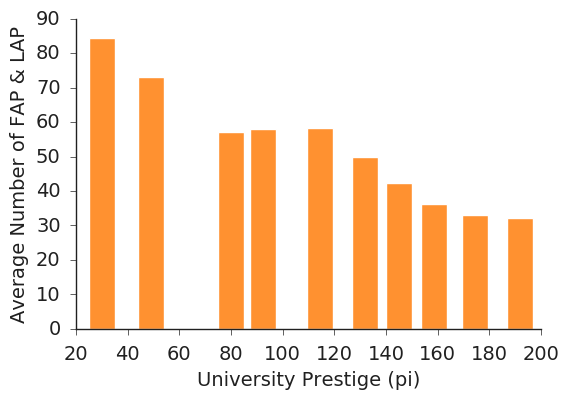

In [24]:
plot_binned_pubs_versus_prestige(first_and_last_pubs_by_inst, 'Average Number of FAP & LAP', bins)

Line of best fit has a slope of -0.3157 and a r^2 of 0.9533


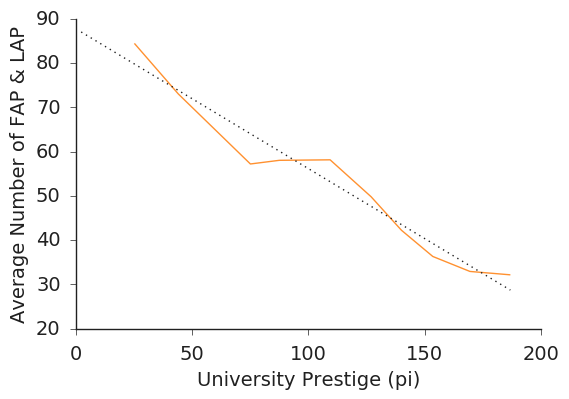

In [26]:
plot_binned_pubs_versus_prestige(first_and_last_pubs_by_inst, 'Average Number of FAP & LAP', bins, chart_type='line')